In [ ]:
import pandas as pd


df1 = pd.read_csv('ball_positions1.csv')
df2 = pd.read_csv('ball_positions2.csv')
df3 = pd.read_csv('ball_positions3.csv')


print("Configuração 1:")
display(df1.head())

print("\nConfiguração 2:")
display(df2.head())

print("\nConfiguração 3:")
display(df3.head())

Configuração 1:


,time,raw_x,raw_y,moving_avg_x,moving_avg_y,kalman_x,kalman_y
0,1.726840e+09,-532.446472,-401.341064,-532.446472,-401.341064,-531.118742,-400.340264
1,1.726840e+09,-532.960327,-397.163788,-532.703400,-399.252426,-535.513394,-399.132400
2,1.726840e+09,-531.882385,-398.378754,-532.429728,-398.961202,-533.885939,-398.804948
3,1.726840e+09,-532.323181,-398.397827,-532.403091,-398.820358,-533.483101,-398.672251
4,1.726840e+09,-532.991028,-399.781952,-532.520679,-399.012677,-533.634827,-399.442355



Configuração 2:


,time,raw_x,raw_y,moving_avg_x,moving_avg_y,kalman_x,kalman_y
0,1.726840e+09,-485.225372,324.751556,-485.225372,324.751556,-484.015636,323.941904
1,1.726840e+09,-485.946686,324.893707,-485.586029,324.822632,-488.266378,326.449523
2,1.726840e+09,-482.914429,326.518311,-484.695496,325.387858,-485.069988,327.315736
3,1.726840e+09,-483.024323,326.908936,-484.277702,325.768127,-483.937989,327.717109
4,1.726840e+09,-484.061218,326.697632,-484.234406,325.954028,-484.082801,327.601739



Configuração 3:


,time,raw_x,raw_y,moving_avg_x,moving_avg_y,kalman_x,kalman_y
0,1.726841e+09,-520.980347,-336.181061,-520.980347,-336.181061,-518.389049,-334.508934
1,1.726841e+09,-521.439636,-335.980865,-521.209991,-336.080963,-526.239536,-339.087479
2,1.726841e+09,-522.600037,-336.586029,-521.673340,-336.249318,-525.796993,-338.594837
3,1.726841e+09,-523.086853,-336.812866,-522.026718,-336.390205,-525.585102,-338.343315
4,1.726841e+09,-523.621033,-336.591309,-522.345581,-336.430426,-525.562129,-337.940187


- Ajuste o valor de kf.R (ruído da medição) para aumentar ou diminuir a confiança nos dados recebidos : primeiro teste = 5, segundo teste  = 5, terceiro teste = 10
- Ajuste o valor de kf.Q (ruído do processo) para controlar a confiança no modelo de movimento : primeiro teste = 0.1, segundo teste = 0.5, terceiro teste = 0.5
- Tamanhos de janela da média móvel: primeiro teste = 5 para resposta rápida e o terceiro teste = 10 para suavização mais forte e o segundo teste = 7 para um teste entre os dois

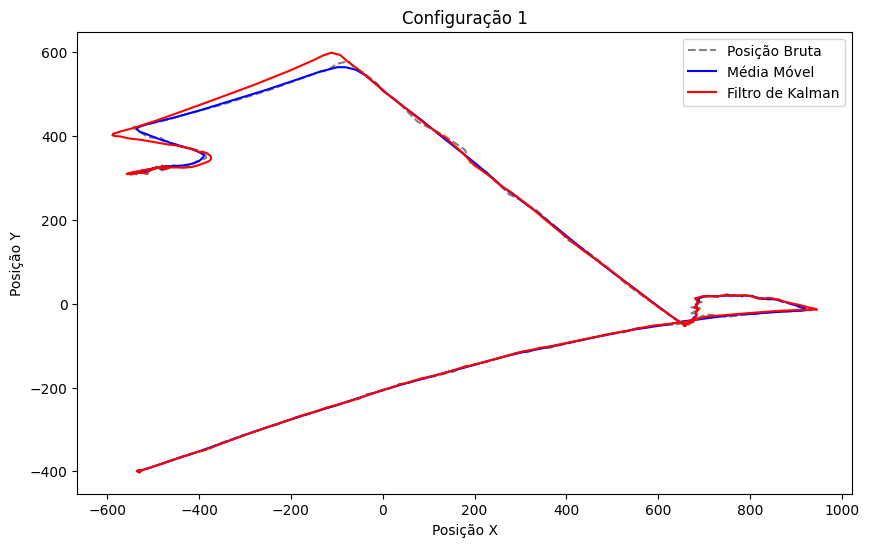

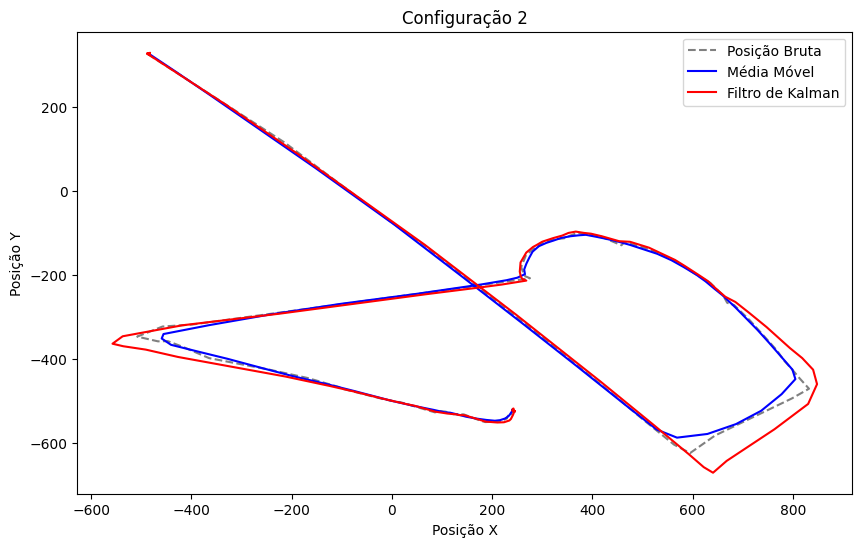

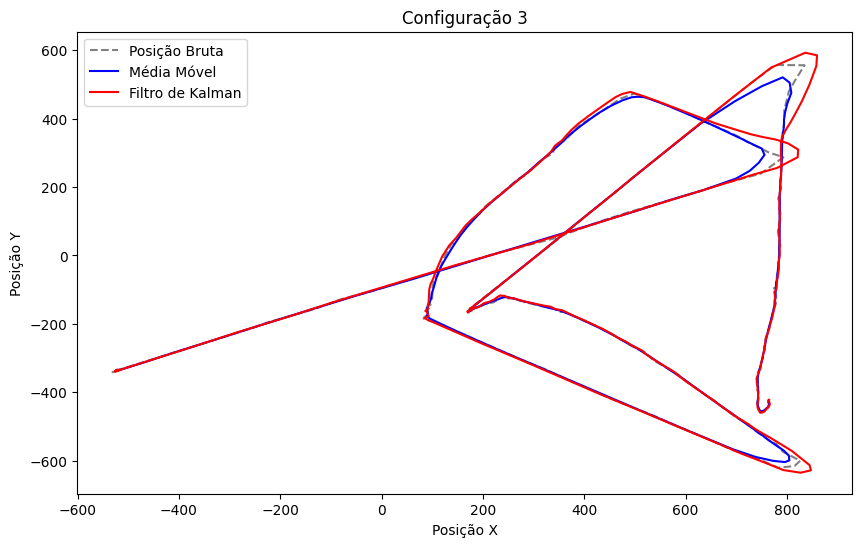

In [ ]:
import matplotlib.pyplot as plt


def plot_data(df, title):
    plt.figure(figsize=(10, 6))

    # Plotar a posição bruta
    plt.plot(df['raw_x'], df['raw_y'], label='Posição Bruta', color='gray', linestyle='--')

    # Plotar a posição suavizada pela média móvel
    plt.plot(df['moving_avg_x'], df['moving_avg_y'], label='Média Móvel', color='blue')

    # Plotar a posição suavizada pelo filtro de Kalman
    plt.plot(df['kalman_x'], df['kalman_y'], label='Filtro de Kalman', color='red')

    plt.title(title)
    plt.xlabel('Posição X')
    plt.ylabel('Posição Y')
    plt.legend()
    plt.show()

# Plotar os dados de cada configuração
plot_data(df1, 'Configuração 1')
plot_data(df2, 'Configuração 2')
plot_data(df3, 'Configuração 3')


In [ ]:
import numpy as np

# Função para calcular o Erro Médio Absoluto
def calculate_mae(df, method_x, method_y):
    return np.mean(np.sqrt((df['raw_x'] - df[method_x])**2 + (df['raw_y'] - df[method_y])**2))

# Função para calcular o Erro Quadrático Médio
def calculate_rmse(df, method_x, method_y):
    return np.sqrt(np.mean((df['raw_x'] - df[method_x])**2 + (df['raw_y'] - df[method_y])**2))


for i, df in enumerate([df1, df2, df3], start=1):
    print(f"\nConfiguração {i} - Média Móvel:")
    mae_avg = calculate_mae(df, 'moving_avg_x', 'moving_avg_y')
    rmse_avg = calculate_rmse(df, 'moving_avg_x', 'moving_avg_y')
    print(f"MAE: {mae_avg:.4f}, RMSE: {rmse_avg:.4f}")

    print(f"Configuração {i} - Filtro de Kalman:")
    mae_kalman = calculate_mae(df, 'kalman_x', 'kalman_y')
    rmse_kalman = calculate_rmse(df, 'kalman_x', 'kalman_y')
    print(f"MAE: {mae_kalman:.4f}, RMSE: {rmse_kalman:.4f}")



Configuração 1 - Média Móvel:
MAE: 16.9356, RMSE: 32.6964
Configuração 1 - Filtro de Kalman:
MAE: 6.0883, RMSE: 12.6835

Configuração 2 - Média Móvel:
MAE: 55.6710, RMSE: 107.4572
Configuração 2 - Filtro de Kalman:
MAE: 15.9975, RMSE: 32.3575

Configuração 3 - Média Móvel:
MAE: 41.1839, RMSE: 69.8673
Configuração 3 - Filtro de Kalman:
MAE: 11.0840, RMSE: 22.8195
